# 3章 顧客の全体像を把握する１０本ノック

ここでは、スポーツジムの会員データを使って顧客の行動を分析していきます。  
これまでと同様にまずはデータを理解し、加工した後、  
顧客の行動データを分析していきましょう。  
ここでは、機械学習に向けての初期分析を行います。

### ノック21：データを読み込んで把握しよう

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
use_log = pd.read_csv("use_log.csv")
print(len(use_log))
use_log.head()

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [2]:
campaign_master = pd.read_csv("campaign_master.csv")
print(len(campaign_master))
campaign_master.head()

3


,campaign_id,campaign_name
0,CA1,通常
1,CA2,入会費半額
2,CA3,入会費無料


In [3]:
class_master = pd.read_csv("class_master.csv")
print(len(class_master))
class_master.head()

3


,class,class_name,price
0,C01,オールタイム,10500
1,C02,デイタイム,7500
2,C03,ナイト,6000


In [4]:
customer_master = pd.read_csv("customer_master.csv")
print(len(customer_master))
customer_master.head()

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


### ノック22：顧客データを整形しよう

In [5]:
customer_join = pd.merge(customer_master, campaign_master, on = 'campaign_id', how = 'left')
customer_join = pd.merge(customer_join, class_master, on = 'class', how = 'left')
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,通常,オールタイム,10500
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,通常,オールタイム,10500
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,通常,オールタイム,10500
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,通常,オールタイム,10500
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,通常,ナイト,6000


In [6]:
print(len(customer_master))
print(len(customer_join))

4192
4192


In [7]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
campaign_name       0
class_name          0
price               0
dtype: int64

### ノック23：顧客データの基礎集計をしよう

In [8]:
customer_join.groupby("class_name").count()["customer_id"]

class_name
オールタイム    2045
デイタイム     1019
ナイト       1128
Name: customer_id, dtype: int64

In [9]:
customer_join.groupby("gender").count()["customer_id"]

gender
F    1983
M    2209
Name: customer_id, dtype: int64

In [10]:
customer_join.groupby("campaign_name").count()["customer_id"]

campaign_name
入会費半額     650
入会費無料     492
通常       3050
Name: customer_id, dtype: int64

In [11]:
customer_join.groupby("is_deleted").count()["customer_id"]

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

In [12]:
customer_join['start_date'] = pd.to_datetime(customer_join["start_date"])
customer_start = customer_join.loc[customer_join["start_date"] > pd.to_datetime("20180401")]
print(len(customer_start))

1361


In [13]:
customer_join.groupby("start_date").count()["customer_id"]

start_date
2015-05-01    62
2015-06-01    69
2015-07-01    53
2015-08-01    53
2015-09-01    71
              ..
2019-03-11     3
2019-03-12     8
2019-03-13     4
2019-03-14     4
2019-03-15     1
Name: customer_id, Length: 215, dtype: int64

In [14]:
customer_join.groupby("end_date").count()["customer_id"]

end_date
2018-04-30 00:00:00    121
2018-05-31 00:00:00    125
2018-06-30 00:00:00    106
2018-07-31 00:00:00    102
2018-08-31 00:00:00    113
2018-09-30 00:00:00    104
2018-10-31 00:00:00     90
2018-11-30 00:00:00     89
2018-12-31 00:00:00    111
2019-01-31 00:00:00    129
2019-02-28 00:00:00    149
2019-03-31 00:00:00    111
Name: customer_id, dtype: int64

In [15]:
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,通常,オールタイム,10500
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,通常,オールタイム,10500
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,通常,オールタイム,10500
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,通常,オールタイム,10500
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,通常,ナイト,6000


### ノック24：最新顧客データの基礎集計をしよう

In [16]:
customer_join['end_date'] = pd.to_datetime(customer_join['end_date'])
customer_newer = customer_join.loc[(customer_join['end_date'] >= pd.to_datetime('20190331')) | (customer_join['end_date'].isnull())]
print(len(customer_newer))
customer_newer['end_date'].unique()

2953


array([                          'NaT', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [17]:
customer_newer.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,通常,オールタイム,10500
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,通常,オールタイム,10500
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,通常,オールタイム,10500
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,通常,オールタイム,10500
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,通常,ナイト,6000


In [18]:
customer_newer.groupby("class_name").count()['customer_id']

class_name
オールタイム    1444
デイタイム      696
ナイト        813
Name: customer_id, dtype: int64

In [19]:
customer_newer.groupby("gender").count()['customer_id']

gender
F    1400
M    1553
Name: customer_id, dtype: int64

In [20]:
customer_newer.groupby("campaign_name").count()['customer_id']

campaign_name
入会費半額     311
入会費無料     242
通常       2400
Name: customer_id, dtype: int64

### ノック25：利用履歴データを集計しよう

In [21]:
use_log['usedate'] = pd.to_datetime(use_log['usedate'])
use_log['年月'] = use_log['usedate'].dt.strftime('%Y%m')
use_log_month = use_log.groupby(["年月", "customer_id"], as_index = False).count()
use_log_month.rename(columns = {"log_id":"count"}, inplace = True)
del use_log_month["usedate"]
use_log_month.head()

,年月,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [22]:
uselog_customer = use_log_month.groupby('customer_id').agg(['mean', 'median', 'max', 'min'])['count']
uselog_customer = uselog_customer.reset_index(drop = False)
uselog_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


In [23]:
uselog_customer["max"].max()

14

### ノック26：利用履歴データから定期利用フラグを作成しよう

In [24]:
#dt.weekdayで月～日が0～6で割り振られる
use_log["weekday"] = use_log["usedate"].dt.weekday
uselog_weekday = use_log.groupby(["customer_id", "年月", "weekday"], as_index = False).count()[["customer_id", "年月", "weekday", "log_id"]]
uselog_weekday.rename(columns = {"log_id": "count"}, inplace = True)
uselog_weekday.head()

,customer_id,年月,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


In [25]:
uselog_weekday = uselog_weekday.groupby("customer_id", as_index = False).max()[["customer_id", "count"]]
uselog_weekday
uselog_weekday["routine_flg"] = 0
uselog_weekday["routine_flg"] = uselog_weekday["routine_flg"].where(uselog_weekday["count"] < 4, 1)
uselog_weekday.head()

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


### ノック27：顧客データと利用履歴データを結合しよう

In [26]:
uselog_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


In [27]:
uselog_weekday.head()

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


In [28]:
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,通常,オールタイム,10500
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,通常,オールタイム,10500
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,通常,オールタイム,10500
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,通常,オールタイム,10500
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,通常,ナイト,6000


In [29]:
customer_join = pd.merge(customer_join, uselog_customer, on = "customer_id", how = "left")
customer_join = pd.merge(customer_join, uselog_weekday[["customer_id", "routine_flg"]], on = "customer_id", how = "left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,通常,オールタイム,10500,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,通常,オールタイム,10500,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,通常,オールタイム,10500,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,通常,オールタイム,10500,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,通常,ナイト,6000,3.916667,4.0,6,1,1


In [30]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
campaign_name       0
class_name          0
price               0
mean                0
median              0
max                 0
min                 0
routine_flg         0
dtype: int64

### ノック28：会員期間を計算しよう

In [31]:
from dateutil.relativedelta import relativedelta
customer_join["calc_date"] = customer_join["end_date"]
customer_join["calc_date"] = customer_join["calc_date"].fillna(pd.to_datetime("20190430"))
customer_join["membership_period"] = 0
for i in range(len(customer_join)):
    delta = relativedelta(customer_join["calc_date"].iloc[i], customer_join["start_date"].iloc[i])
    customer_join["membership_period"].iloc[i] = delta.years*12 + delta.months
customer_join.head()

C:\Users\Yusuke\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,通常,オールタイム,10500,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,通常,オールタイム,10500,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,通常,オールタイム,10500,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,通常,オールタイム,10500,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,通常,ナイト,6000,3.916667,4.0,6,1,1,2019-04-30,47


In [32]:
customer_join["membership_period"].describe()

count    4192.000000
mean       18.835878
std        13.848148
min         1.000000
25%         7.000000
50%        15.000000
75%        30.000000
max        47.000000
Name: membership_period, dtype: float64

### ノック29：顧客行動の各種統計量を把握しよう

In [33]:
customer_join[["mean", "median", "max", "min"]].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [34]:
customer_join.groupby("routine_flg").count()["customer_id"]

routine_flg
0     779
1    3413
Name: customer_id, dtype: int64

(array([307., 159., 236., 155., 170., 146., 337., 121., 144., 134.,  62.,
         55.,  73., 145.,  71.,  79.,  89.,  62.,  74.,  86., 129.,  64.,
         71.,  67.,  59.,  59., 143.,  62.,  72.,  53.,  57.,  55.,  48.,
        123.,  63.,  54.,  71.,  53.,  53., 131.]),
 array([ 1.  ,  2.15,  3.3 ,  4.45,  5.6 ,  6.75,  7.9 ,  9.05, 10.2 ,
        11.35, 12.5 , 13.65, 14.8 , 15.95, 17.1 , 18.25, 19.4 , 20.55,
        21.7 , 22.85, 24.  , 25.15, 26.3 , 27.45, 28.6 , 29.75, 30.9 ,
        32.05, 33.2 , 34.35, 35.5 , 36.65, 37.8 , 38.95, 40.1 , 41.25,
        42.4 , 43.55, 44.7 , 45.85, 47.  ]),
 <a list of 40 Patch objects>)

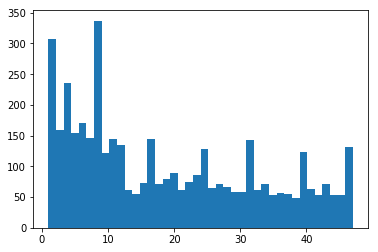

In [38]:
plt.hist(customer_join["membership_period"], bins = 40)

### ノック30：退会ユーザーと継続ユーザーの違いを把握しよう

In [39]:
customer_end = customer_join.loc[customer_join["is_deleted"] == 1]
customer_end.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,8.026667
std,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,7.000000
75%,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,11.000000
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,23.000000


In [40]:
customer_end = customer_join.loc[customer_join["is_deleted"] == 0]
customer_end.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,23.970443
std,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,13.746761
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,1.000000
25%,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,12.000000
50%,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,24.000000
75%,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,35.000000
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000


In [41]:
customer_join.to_csv("customer_join.csv", index = False)